## Нормализованный датасет

In [1]:
import os
import pandas as pd

os.chdir('../../../')

In [2]:
df_normalized = pd.read_csv('data/lmsys-chat-1m/processed/features_normalized.csv',)

### Матрица корреляции

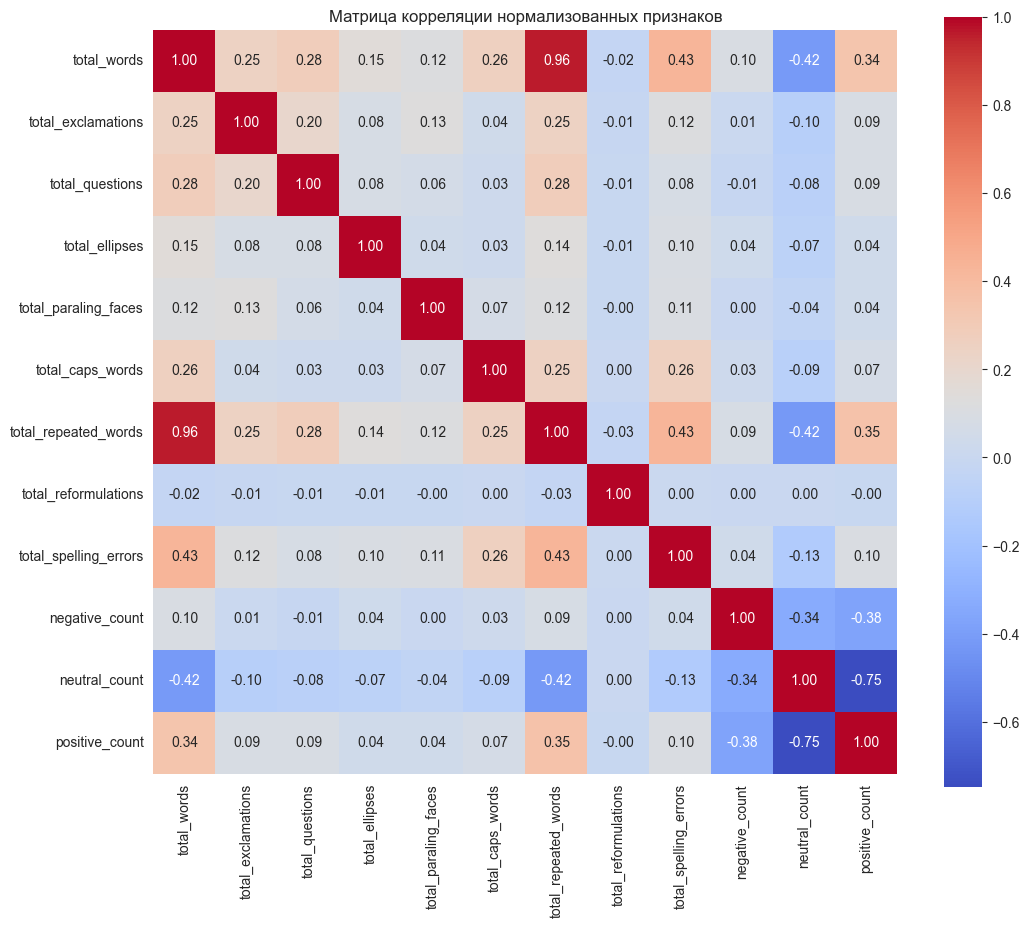

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_cols = [
    col for col in df_normalized.columns
    if col != 'user_id' and pd.api.types.is_numeric_dtype(df_normalized[col])
]

# Строим матрицу корреляции
corr_matrix = df_normalized[numeric_cols].corr()

# Визуализация
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title("Матрица корреляции нормализованных признаков")
plt.show()


### Уберем признаки с сильной корреляцией

In [4]:
df_normalized.drop(['total_repeated_words'], inplace=True, axis=1)
# df_normalized.drop(['neutral_count'], inplace=True, axis=1)


### Подготовка данных

In [5]:
from sklearn.preprocessing import StandardScaler

X = df_normalized.drop(columns=['user_id'])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### Построение дендрограммы (для выбора k)

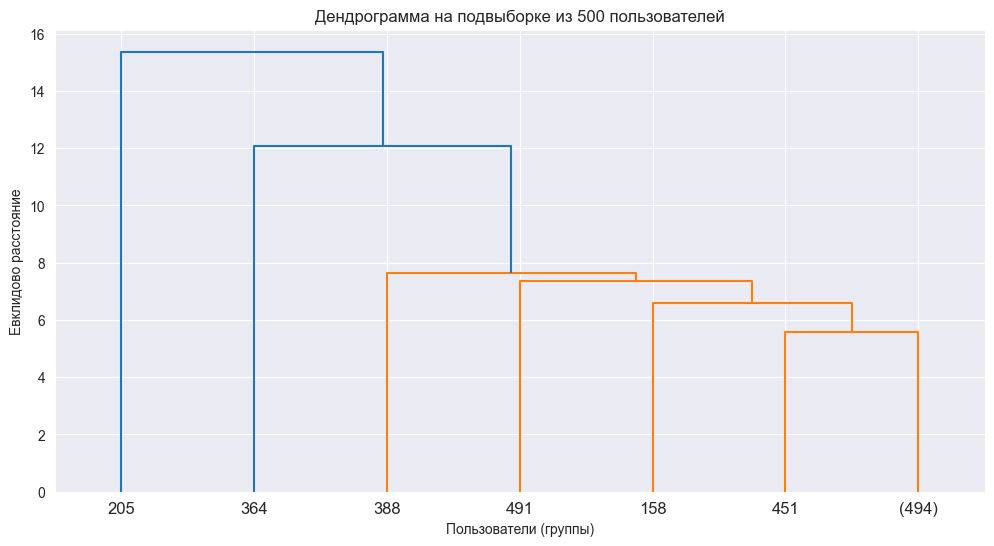

In [16]:
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

sample_size = 500  # иначе oom
X_sampled = X_scaled[np.random.choice(len(X_scaled), sample_size, replace=False)]

# linkage и дендрограмма
linked = linkage(X_sampled, method='single')

plt.figure(figsize=(12, 6))
dendrogram(linked, truncate_mode='level', p=5)
plt.title(f"Дендрограмма на подвыборке из {sample_size} пользователей")
plt.xlabel("Пользователи (группы)")
plt.ylabel("Евклидово расстояние")
plt.grid(True)
plt.show()


### Кластеризация с k=5

In [7]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering

n_clusters = 5

agglo_5 = AgglomerativeClustering(n_clusters=n_clusters, linkage='single')
agglo_labels_5 = agglo_5.fit_predict(X_scaled)

df_agglo_clusters_5 = df_normalized[['user_id']].copy()
df_agglo_clusters_5['agglo_cluster'] = agglo_labels_5

sil_score = silhouette_score(X_scaled, df_agglo_clusters_5['agglo_cluster'])
print(f"Silhouette Score: {sil_score:.3f}")


Silhouette Score: 0.931


In [13]:
df_agglo_clusters_5['agglo_cluster'].value_counts()

agglo_cluster
0    129659
2         2
4         1
3         1
1         1
Name: count, dtype: int64

### Кластеризация с k=6

In [9]:
from sklearn.cluster import AgglomerativeClustering

n_clusters = 6

agglo_6 = AgglomerativeClustering(n_clusters=n_clusters, linkage='single')
agglo_labels_6 = agglo_6.fit_predict(X_scaled)

df_agglo_clusters_6 = df_normalized[['user_id']].copy()
df_agglo_clusters_6['agglo_cluster'] = agglo_labels_6

sil_score = silhouette_score(X_scaled, df_agglo_clusters_6['agglo_cluster'])
print(f"Silhouette Score: {sil_score:.3f}")


Silhouette Score: 0.928


In [10]:
df_agglo_clusters_6['agglo_cluster'].value_counts()

agglo_cluster
0    129658
2         2
4         1
3         1
1         1
5         1
Name: count, dtype: int64

### Визуализация с k=5

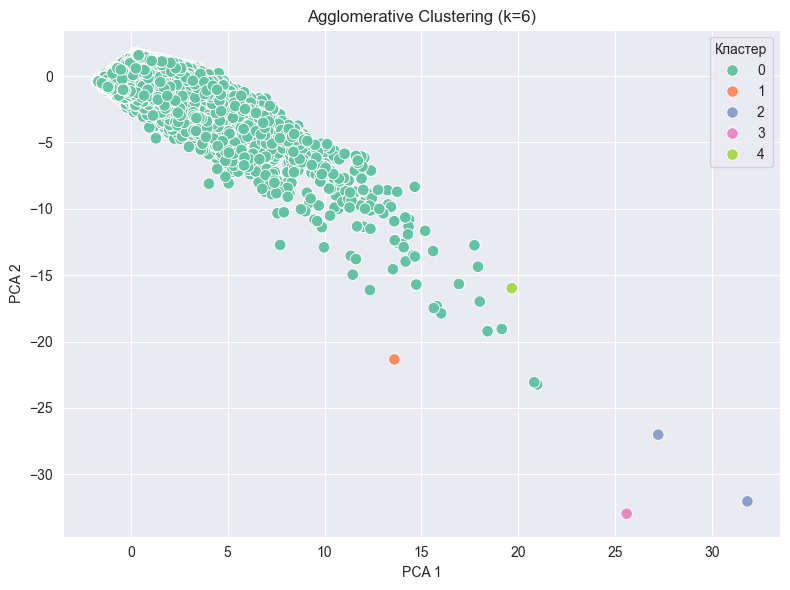

In [11]:
from sklearn.decomposition import PCA
import seaborn as sns

# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Визуализационный df
df_agglo_vis_5 = df_agglo_clusters_5.copy()
df_agglo_vis_5['pca1'] = X_pca[:, 0]
df_agglo_vis_5['pca2'] = X_pca[:, 1]

# Рисуем
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df_agglo_vis_5,
    x='pca1',
    y='pca2',
    hue='agglo_cluster',
    palette='Set2',
    s=70
)
plt.title(f"Agglomerative Clustering (k={n_clusters})")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend(title="Кластер")
plt.grid(True)
plt.tight_layout()
plt.show()


### Визуализация с k=6

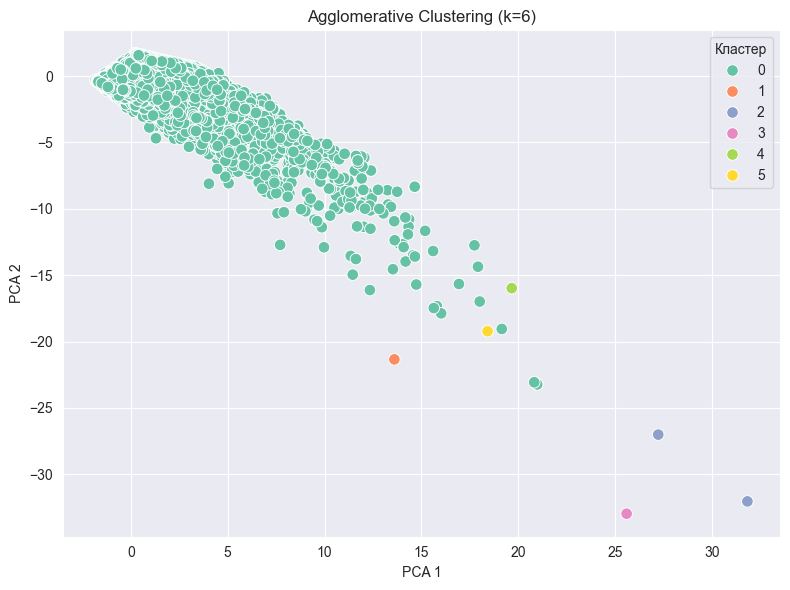

In [12]:
from sklearn.decomposition import PCA
import seaborn as sns

# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Визуализационный df
df_agglo_vis_6 = df_agglo_clusters_6.copy()
df_agglo_vis_6['pca1'] = X_pca[:, 0]
df_agglo_vis_6['pca2'] = X_pca[:, 1]

# Рисуем
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df_agglo_vis_6,
    x='pca1',
    y='pca2',
    hue='agglo_cluster',
    palette='Set2',
    s=70
)
plt.title(f"Agglomerative Clustering (k={n_clusters})")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend(title="Кластер")
plt.grid(True)
plt.tight_layout()
plt.show()
